In [1]:
import json
from pprint import pprint
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def convertToTime(t):
    index = t.find('+0000')
    lst = t.split('+0000')
    t = ''
    for l in lst:
        t = t + l
    return t

In [3]:
def yield_times(hst,mst):
    from datetime import date, time, datetime, timedelta
    start = datetime.combine(date.today(), time(hst, mst))
    yield start.strftime("%H:%M")
    while True:
        start += timedelta(seconds=600)
        yield start.strftime("%H:%M")

In [4]:
def generateTimeGap():
    gen = yield_times(9,30)
    t_seq = []
    for i in range(40):
        t_seq.append(gen.next())

    return t_seq

t_gap = generateTimeGap()

In [5]:
def formatTime(hour,minute):
    m = ''
    if hour < 10: 
        m = m + "0" + str(hour) + ":"
    else: 
        m = m + str(hour) + ":"
    if minute < 10:
        m = m + "0" + str(minute)
    else:
        m = m + str(minute)
    return m

In [6]:
# def groupTweetsByTime(fileName, t_gap):
#     f = open(fileName, 'r')
    
#     mydict = {}
#     i = 0
#     lst = []
#     for line in f:
#         if line.find('created_at') > 0:# filter the deleted tweets
#             tweet = json.loads(line)
#             t = time.strptime(convertToTime(tweet['created_at'])) # convert tweet time to HH:MM format 
#             t1 = formatTime(t.tm_hour, t.tm_min)# get time in format: HH:MM
#             tweet['time'] = t1
#             if t < t_gap[i]:
#                 lst.append(tweet)
#             else:
#                 mydict[t_gap[i]] = lst
#                 lst = [tweet]
#                 if i == len(t_gap)-1:
#                     break
#                 else:
#                     i += 1
#     f.close()
#     return mydict

In [7]:
# test group the tweets by time
# def generateTimeSeq():
#     lst = []
#     for i in xrange(9,15):
#         for j in xrange(0, 59):
#             m = ''
#             if i < 10: 
#                 m = m + "0" + str(i) + ":"
#             else: 
#                 m = m + str(i) + ":"
#             if j < 10:
#                 m = m + "0" + str(j)
#             else:
#                 m = m + str(j)
#             lst.append(m)
#     return lst


# my_seq = generateTimeSeq()

# mydict = {}
# i = 0
# lst = []
# for t in my_seq:
#     if t < t_gap[i]:
#         lst.append(t)
#     else:
#         mydict[t_gap[i]] = lst
#         lst = [t]
#         i += 1
# import pandas as pd

# p = pd.DataFrame(mydict.items())
# p.sort_values(0)


In [8]:
# from yahoo_finance import Share
# import time

# for i in xrange(5):
#     GSPC = Share("^GSPC")
#     IXIC = Share('^IXIC')
#     start = time.time()
#     price_dict = {}
#     GSPC.refresh()
#     IXIC.refresh()
#     price_dict["time"] = time.ctime()
#     price_dict["SP500"] = float(GSPC.get_price())
#     price_dict["nasdaq"] = float(IXIC.get_price())
#     print price_dict
#     end = time.time()
# #     print end - start
#     time.sleep(3)

In [9]:
f = open('data/day3/output3.json', 'r')
i = 0
for line in f:
    if line.find('created_at') > 0:
        i += 1
print i
f.close()

1212648


In [10]:
len(t_gap)

40

In [12]:
i/40

30316

In [13]:
def parseFinance(fileName, t_gap):
    f = open(fileName, 'r')

    sp500 = {}
    nasdaq = {}
    start = t_gap[0]
    end = t_gap[1]
    cursor = 0

    for line in f:
        if line.find('nasdaq') > 0:
            fjson = json.loads(line)
            t = time.strptime(convertToTime(fjson['time']))
            t = formatTime(t.tm_hour,t.tm_min)# get time in format: HH:MM
            fjson['time'] = t
            if t <= start:
                sp500[end] = fjson['SP500']
                nasdaq[end] = fjson['nasdaq']
                continue
            if t > start and t <= end:
                sp500[end] = fjson['SP500']
                nasdaq[end] = fjson['nasdaq']
                continue
            if t > end:
                for j in xrange(cursor, len(t_gap)):
                    if t > t_gap[j]:
                        continue
                    else:
                        cursor = j
                        start = t_gap[j-1]
                        end = t_gap[j]
                        sp500[end] = fjson['SP500']
                        nasdaq[end] = fjson['nasdaq']
                        break

    f.close()

    return sp500, nasdaq

In [14]:
sp500, nasdaq = parseFinance('data/day3/finance3.json', t_gap)

In [15]:
import nltk

In [16]:
from nltk.corpus import stopwords
sw = stopwords.words("english")

In [17]:
FiveMunitesCount = 30000

In [18]:
def groupTweetsByCount(fileName, t_gap): 
    f = open(fileName, 'r')  
    
    i = 0
    count = 0
    lst = []
    mydict = {}
    
    for line in f:
        if line.find('created_at') > 0:
            count += 1
            tweet = json.loads(line)
            lst.append(tweet['text'])
            
            if count == FiveMunitesCount:
                mydict[t_gap[i]] = lst
                i += 1
                lst = []
                count = 0
            elif i == (len(t_gap) -1):
                mydict[t_gap[i]] = lst
                
    f.close()
    return mydict

In [19]:
mydict = groupTweetsByCount('data/day3/output3.json',t_gap)

In [20]:
# f = open('output3.json','r')
# lst = []
# for line in f:
#     if line.find('created_at') > 0:
#         tweet = json.loads(line)
#         lst.append(tweet['text'])
# f.close()
# words = [ w for t in lst 
#               for w in t.split() ]
# cleaned_words = [item.lower() for item in words if item not in sw]

# mypd = pd.DataFrame(cleaned_words)
# mypd.columns = ['word']

# merged_positive = pd.merge(left=positives, right=mypd, how='right', on='word')
# print(merged_positive.head())
# merged_negative = pd.merge(left=negatives, right=mypd, how='right', on='word')
# print(merged_negative.head())
len(mydict)

40

In [21]:
# split to the words and remove the stopwords
for key in mydict.keys():
    words = [ w for t in mydict[key] 
              for w in t.split() ]
    cleaned_words = [item.lower() for item in words if item not in sw]
    mydict[key] = cleaned_words


In [22]:
positives = pd.read_csv('positives.csv')
negatives = pd.read_csv('negatives.csv')

In [23]:
ratios = {}
diffs = {}
for key in mydict.keys():
    mypd = pd.DataFrame(mydict[key])
    mypd.columns = ['word']
    merged_positive = pd.merge(left=positives, right=mypd, how='right', on='word')
    merged_negative = pd.merge(left=negatives, right=mypd, how='right', on='word')
    merged_positive['value'].fillna(0, inplace=True)
    merged_negative['value'].fillna(0, inplace=True)
    pn_ratio = sum(merged_positive['value'])/abs(sum(merged_negative['value']))
    ratios[key] = pn_ratio
    diffs[key] = sum(merged_positive['value']) - abs(sum(merged_negative['value']))

/Users/wangqian/anaconda/lib/python2.7/site-packages/pandas/tools/merge.py:679: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


In [24]:
pd_ratios = pd.DataFrame(ratios.items(), columns=['time', 'value'])
pd_diffs = pd.DataFrame(diffs.items(), columns=['time', 'value'])
pd_nasdaq = pd.DataFrame(nasdaq.items(), columns=['time', 'index'])
pd_sp500 = pd.DataFrame(sp500.items(), columns=['time', 'index'])

merge1 = pd.merge(left=pd_ratios, right=pd_nasdaq, how='inner', on='time').sort_values('time')
merge2 = pd.merge(left=pd_ratios, right=pd_sp500, how='inner', on='time').sort_values('time')
merge3 = pd.merge(left=pd_diffs, right=pd_nasdaq, how='inner', on='time').sort_values('time')
merge4 = pd.merge(left=pd_diffs, right=pd_sp500, how='inner', on='time').sort_values('time')


In [ ]:
merge1.to_csv('data/day3/day3_merge1.csv')
merge2.to_csv('data/day3/day3_merge2.csv')
merge3.to_csv('data/day3/day3_merge3.csv')
merge4.to_csv('data/day3/day3_merge4.csv')

In [38]:
mymerge3 = pd.read_csv('data/day3/day3_merge3.csv')

In [39]:
import statsmodels.tsa.stattools

In [40]:
test1 = statsmodels.tsa.stattools.grangercausalitytests(merge1[['value','index']], 5)



Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=3.7735  , p=0.0602  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=4.0969  , p=0.0430  , df=1
likelihood ratio test: chi2=3.8908  , p=0.0486  , df=1
parameter F test:         F=3.7735  , p=0.0602  , df_denom=35, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=2.1788  , p=0.1297  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=5.0385  , p=0.0805  , df=2
likelihood ratio test: chi2=4.7237  , p=0.0942  , df=2
parameter F test:         F=2.1788  , p=0.1297  , df_denom=32, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=1.2376  , p=0.3140  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=4.6091  , p=0.2028  , df=3
likelihood ratio test: chi2=4.3370  , p=0.2273  , df=3
parameter F test:         F=1.2376  , p=0.3140  , df_denom=29, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=1.3980

In [41]:
test2 = statsmodels.tsa.stattools.grangercausalitytests(merge2[['value','index']], 5)


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=8.1114  , p=0.0073  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=8.8066  , p=0.0030  , df=1
likelihood ratio test: chi2=7.9207  , p=0.0049  , df=1
parameter F test:         F=8.1114  , p=0.0073  , df_denom=35, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=4.4031  , p=0.0205  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=10.1821 , p=0.0062  , df=2
likelihood ratio test: chi2=8.9946  , p=0.0111  , df=2
parameter F test:         F=4.4031  , p=0.0205  , df_denom=32, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=1.4935  , p=0.2371  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=5.5618  , p=0.1350  , df=3
likelihood ratio test: chi2=5.1719  , p=0.1596  , df=3
parameter F test:         F=1.4935  , p=0.2371  , df_denom=29, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=2.8027

In [42]:
test3 = statsmodels.tsa.stattools.grangercausalitytests(merge3[['value','index']], 5)


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=7.0728  , p=0.0117  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=7.6790  , p=0.0056  , df=1
likelihood ratio test: chi2=6.9940  , p=0.0082  , df=1
parameter F test:         F=7.0728  , p=0.0117  , df_denom=35, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=4.6334  , p=0.0171  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=10.7148 , p=0.0047  , df=2
likelihood ratio test: chi2=9.4100  , p=0.0090  , df=2
parameter F test:         F=4.6334  , p=0.0171  , df_denom=32, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=2.1526  , p=0.1152  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=8.0165  , p=0.0457  , df=3
likelihood ratio test: chi2=7.2377  , p=0.0647  , df=3
parameter F test:         F=2.1526  , p=0.1152  , df_denom=29, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=1.9519

In [43]:
test4 = statsmodels.tsa.stattools.grangercausalitytests(merge4[['value','index']], 5)


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=10.1884 , p=0.0030  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=11.0617 , p=0.0009  , df=1
likelihood ratio test: chi2=9.7087  , p=0.0018  , df=1
parameter F test:         F=10.1884 , p=0.0030  , df_denom=35, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=7.6876  , p=0.0019  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=17.7777 , p=0.0001  , df=2
likelihood ratio test: chi2=14.5175 , p=0.0007  , df=2
parameter F test:         F=7.6876  , p=0.0019  , df_denom=32, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=2.8832  , p=0.0527  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=10.7375 , p=0.0132  , df=3
likelihood ratio test: chi2=9.3970  , p=0.0245  , df=3
parameter F test:         F=2.8832  , p=0.0527  , df_denom=29, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=3.1745

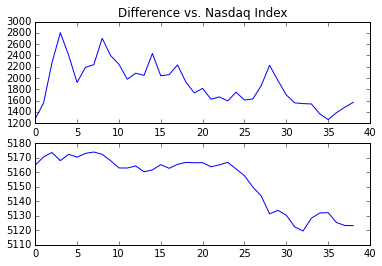

In [45]:
plt.figure(1)

plt.subplot(211)
plt.plot(merge3['value'])
plt.title("Difference vs. Nasdaq Index")

plt.subplot(212)
plt.plot(merge3['index'])


plt.show()